<a href="https://colab.research.google.com/github/cgangwar11/Coding-Practice/blob/master/demo_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
featuretools 0.4.1 has requirement pandas>=0.23.0, but you'll have pandas 0.22.0 which is incompatible.
albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.
Done.


In [0]:
from fastai import *
from fastai.text import *
import spacy
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
import seaborn as sns
import pandas as pd
from pprint import pprint
nlp = spacy.load('en')

In [0]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
data_clas = load_data('/gdrive/My Drive/imdb', 'data_clas.pkl', bs=48)

In [0]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)

In [0]:
learn = learn.load('third_v1')

Using Sequential models we can learn longer dependencies between sentences.

In [0]:
########### https://in.reuters.com/article/europe-stocks/european-shares-flat-results-from-elekta-sika-sopra-steria-drive-big-swings-idINL5N20H1ZY
# https://www.theguardian.com/business/2019/mar/10/deutsche-bank-begins-talks-over-merger-with-rival-commerzbank

In [0]:
def predict_and_plot(text,tensor):
    data = pd.DataFrame(columns=["Text","Positive","Negative","Prediction"])
    cat=tensor.to('cpu').numpy()[0]
    if cat[1]>0.5:
      pred=1
    else:
      pred=-1
    col = {-1:'r',1:'g'}
   
    data.loc[0] = [str(text),cat[1],cat[0],pred]
    sns.set(rc={'figure.figsize':(11.7,2)},font_scale=2)
    sns.plt.xlim(-1,1)
    sns.set_style("whitegrid")
    ax=sns.barplot(x='Positive',y='Text', data=data,color=col[int(pred)])
    

In [0]:
def predict_and_plot_in_group(corpus,chars_to_replace={}):
    corpus = corpus.replace("\n", " ")
    for i,j in chars_to_replace.items():
        corpus = corpus.replace(i,j)
#     corpus = corpus.replace("-", "")
    doc = nlp(corpus)
    data = pd.DataFrame(columns=["Text","Positive","Negative","Prediction"])
    for index,sentences in enumerate(doc.sents):
        cat,pred,senti=learn.predict(sentences)
        pred,senti = pred.numpy(),senti.numpy()
        if pred==0:
            pred=-1
        data.loc[index] = [str(sentences),senti[1],senti[0],pred]
    sns.set(rc={'figure.figsize':(11.7,8.27)},font_scale=2)
    sns.set_style("whitegrid")
    ax=sns.barplot(x='Positive',y='Text', data=data)
def predict_and_plot_in_group_1(corpus,chars_to_replace={}):
    corpus = corpus.replace("\n", " ")
    
    for i,j in chars_to_replace.items():
        corpus = corpus.replace(i,j)
#     corpus = corpus.replace("-", "")
    doc = nlp(corpus)
    data = pd.DataFrame(columns=["Text","Positive","Negative","Prediction"])
    for index,sentences in enumerate(doc.sents):
        cat,pred,senti=learn.predict(sentences)
        pred,senti = pred.numpy(),senti.numpy()
        if pred==0:
            pred=-1
        data.loc[index] = [str(sentences),senti[1],senti[0],pred]
    threshold = np.mean(data.Positive)
    print(threshold)
    coil = {-1:'r',1:'g'}
    data.Prediction = np.array([-1 if i<threshold else 1 for i in data.Positive])
    col = {i:coil[int(j)] for i,j in zip(data.Text,data.Prediction)}
    sns.set(rc={'figure.figsize':(11.7,8.27)},font_scale=2)
    sns.set_style("whitegrid")
    ax=sns.barplot(x='Prediction',y='Text', data=data,palette=col)


    

In [0]:
corpus1 = """
 Europe’s main stock markets barely budged on Friday but results from companies including Sweden’s Elekta, Switzerland’s Sika, and France’s Sopra Steria kept trading lively while investors waited with bated breath for news from crucial U.S.-China trade talks.

The STOXX 600 and Germany’s dax were both flat by 0830 GMT, with the main action at the stock level.

Shares in Sopra Steria topped the STOXX 600 with a 17 percent gain after the French IT services and consulting firm reported full-year results.

Chipmaker ASM International jumped 6.3 percent after it said fourth-quarter order intake hit a record high of 301.6 million euros, well above its forecast.

In other strong results, Swiss construction chemicals maker Sika rose 4.6 percent after full-year profit beat expectations.

Meanwhile Elekta brought up the rear with a 10.6 percent slide after the Swedish radiation therapy equipment maker reported third-quarter earnings well below market expectations, and cut its full-year margin forecast.

The food and beverage sector was the worst-performing, down 0.6 percent, after U.S.-based Kraft Heinz reported weak results, sending its shares down 20 percent in after-hours Wall Street trade.

AB Inbev fell 2.3 percent, Nestle lost 0.6 percent and Danone dipped 0.4 percent , Unilever also dropped 0.9 percent.

Saint Gobain shares fell 3.1 percent after the company reported a slump in annual net profit, blaming asset impairments amid uncertainty over the economy.

Shares in car parts maker valeo see-sawed in early deals after its results, up just 0.7 percent by 0830 GMT.

In the UK, M&A livened up trading. Dairy Crest shares increased 12.9 percent after Canada’s Saputo bought Britain’s largest dairy food company for about 975 million pounds ($1.3 billion)
"""


0.35686233919113874


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


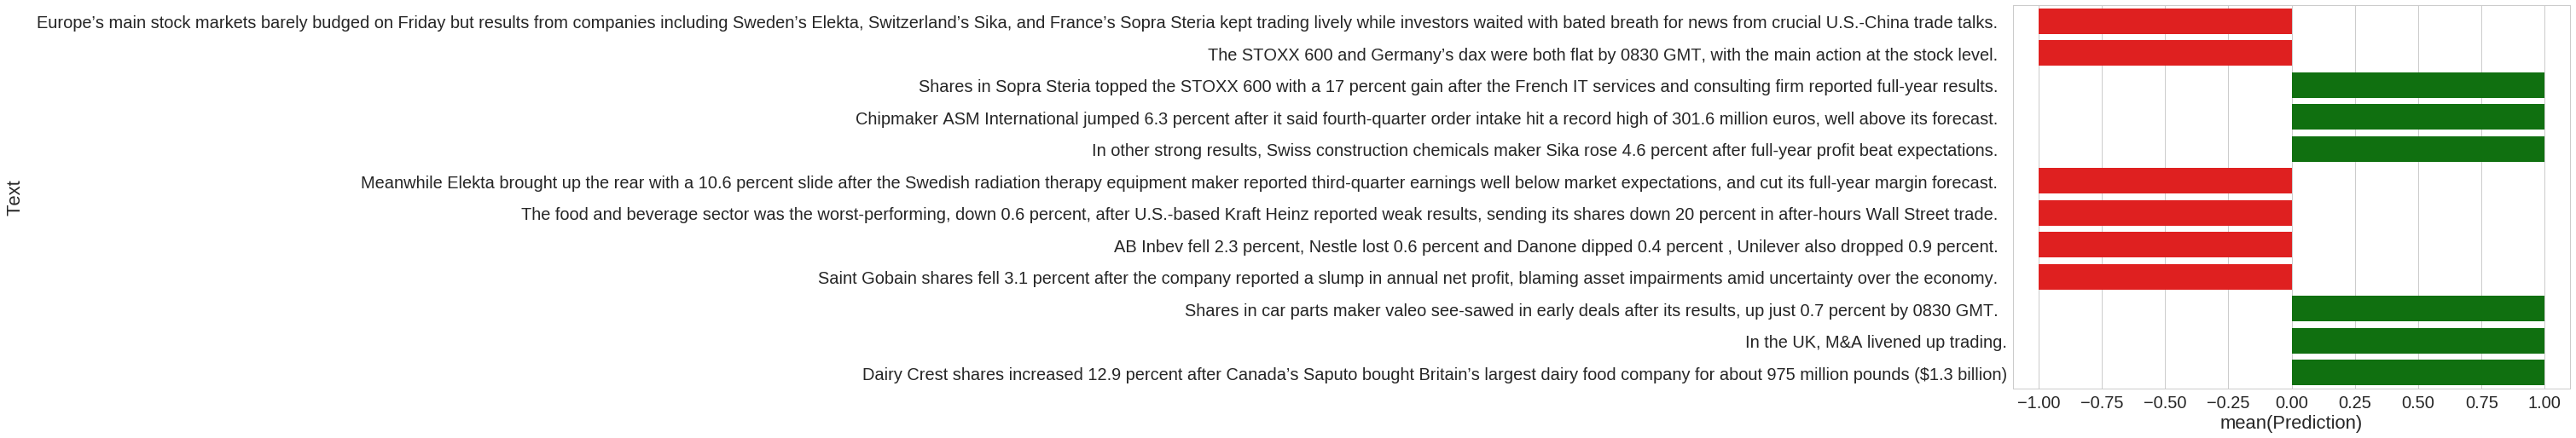

In [0]:
predict_and_plot_in_group_1(corpus1)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


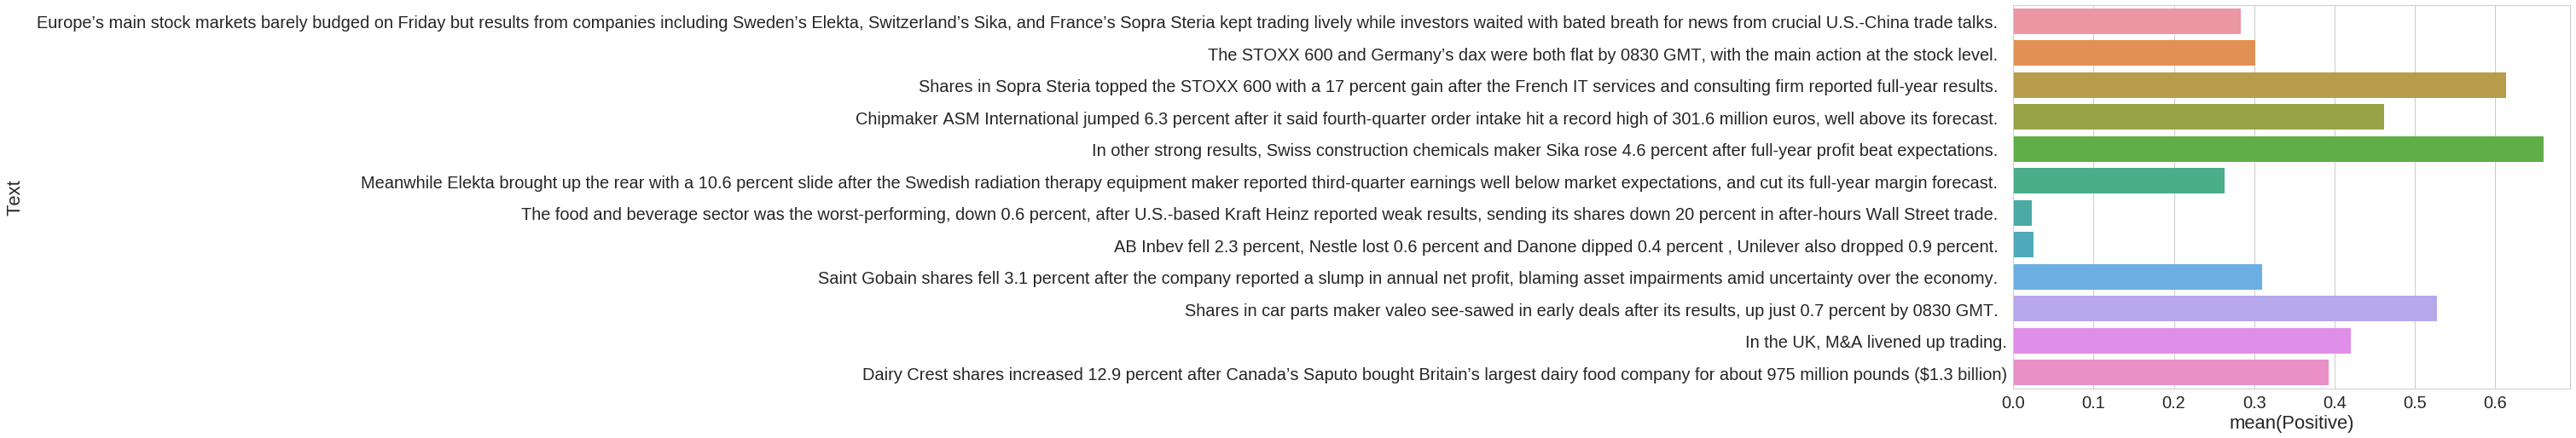

In [0]:
predict_and_plot_in_group(corpus1)

In [0]:
corpus4 ="""
Deutsche Bank has begun tentative merger talks with rival Commerzbank, which would create Europe’s second biggest bank behind HSBC and fend off unwanted potential bidders such as French giant BNP Paribas.
Reports in Germany’s Welt am Sonntag suggest that the banks have come under political pressure to consider a merger and avert a foreign takeover of Commerzbank, much the smaller partner in any deal.
Deutsche is regarded as a bank of global importance, but has been plagued by three years of losses, boardroom battles, money laundering issues and its role as the biggest lender to the Trump business empire.
Despite Germany’s industrial dominance in Europe, it has only one bank in the continent’s top 20, and Berlin is understood to be keen to create a larger national champion. The combination of the two banks mean that Deutsche, currently fifth biggest, and Commerzbank, currently 23rd, will become Europe’s second biggest bank and only marginally behind HSBC.
Deutsche Bank’s chief executive Christian Sewing was seen to be the main opponent of a merger, but investor pressure – Deutsche’ shares are trading at around €7.68 compared with €32 five years ago – is understood to have forced his hand.
The talks are believed to be at a very early stage unofficial contacts in a very small group according to Welt am Sonntag – but are likely to be welcomed by major shareholders.
Cerberus, the US private equity group that is one of the biggest shareholders in both Deutsche Bank and Commerzbank, is reportedly keen on a merger, while Deutsche Bank’s chairman Paul Achleitner is also said to be open to the idea.
Resistance to a merger may come from Commerzbank, according to Reuters. Commerzbank has largely shed itself of its investment banking activities and become a simpler and more stable retail and corporate lender. But Deutsche remains a significant investment bank player with huge, loss-making trading activities. The Wall Street Journal reported last week that Deutsche lost $750m (£576m) in equity trading in New York alone during 2018.
There are also question marks over how much of a premium Deutsche could offer Commerzbank shareholders. If the bank stumps up more than €10bn, or a third over Commerzbank’s current share price, then it would send the banks core financial ratios below target.
"""

0.5958305448293686


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


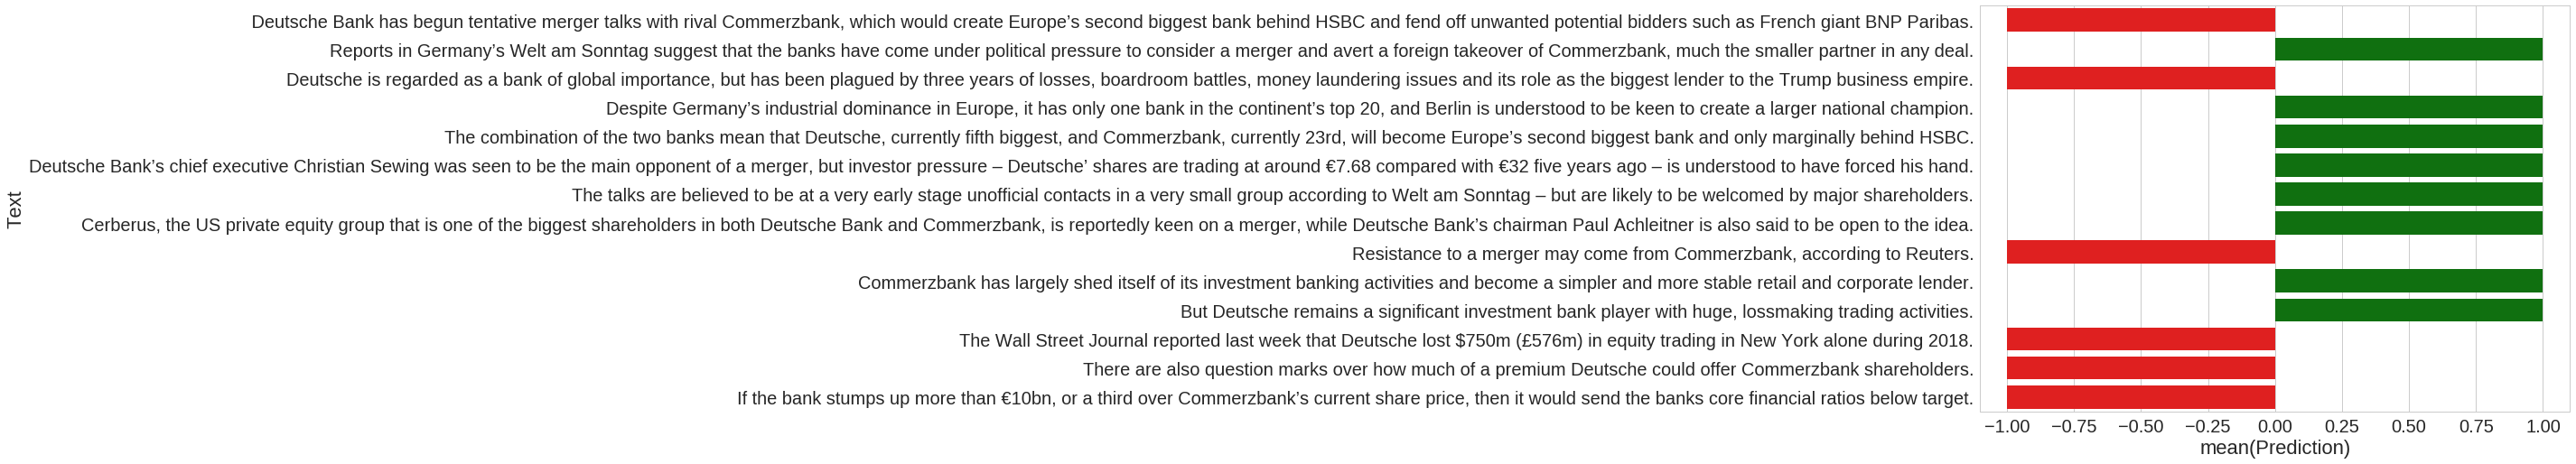

In [0]:
predict_and_plot_in_group_1(corpus4,{"-":""})

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


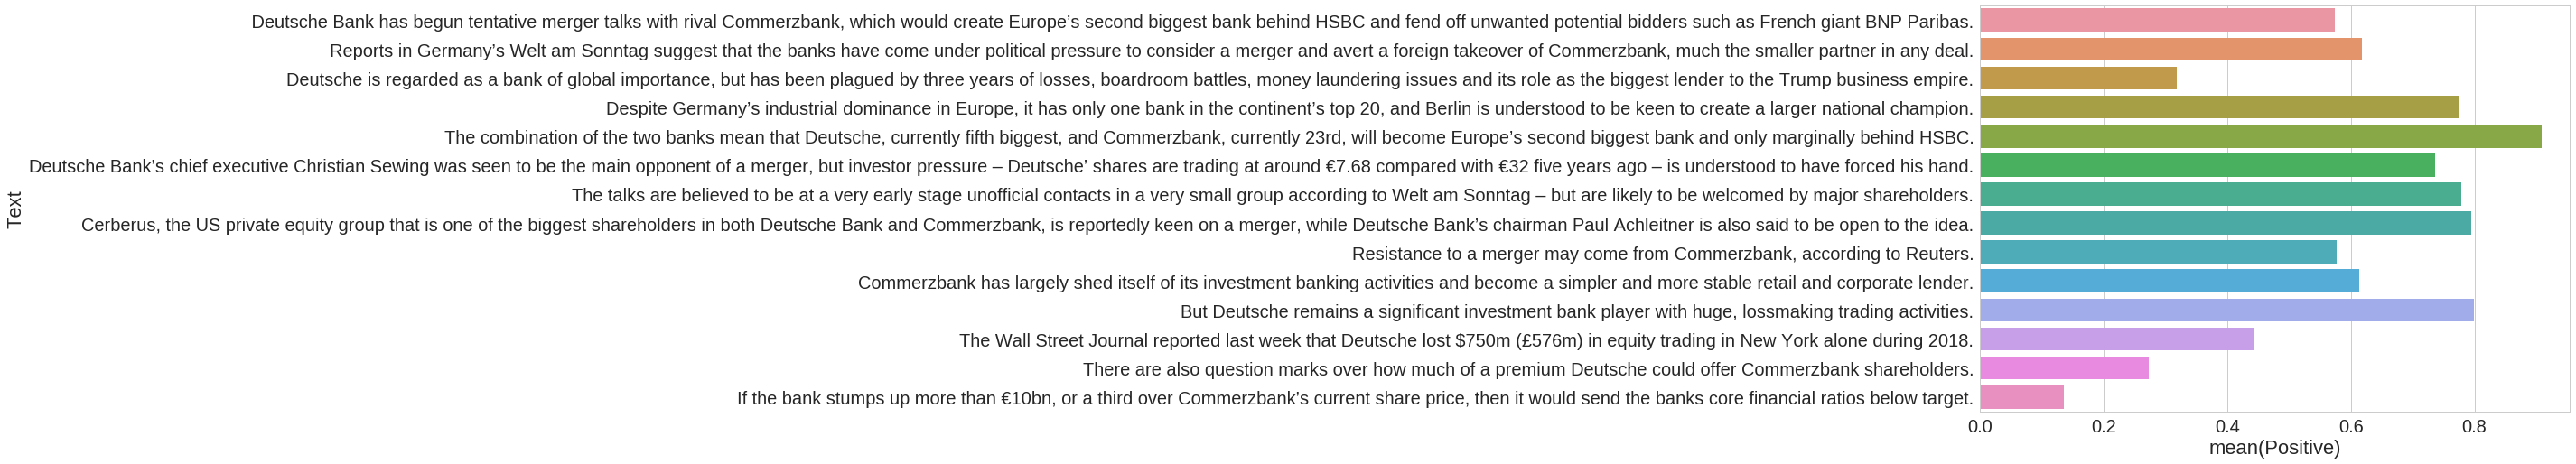

In [0]:
predict_and_plot_in_group(corpus4,{"-":""})

In [0]:
corpus2 = """Nearly 90 percent of all firms moving to Frankfurt are banks, while two-thirds of those going to Amsterdam are trading platforms or brokers. Paris is carving out a niche for markets and trading operations of banks and attracting a broad spread of firms.
New Financial identified 5,000 expected staff moves or local hires, a figure that is expected to rise in coming years.
A better measure of Brexit’s impact is the scale of assets and funds being transferred, it said.
Ten large banks and investment banks are together moving 800 billion pounds of assets from Britain - or 10 percent of banking assets in the country. A small selection of insurers have shifted a combined 35 billion pounds in assets, and a handful of asset managers have moved a total of 65 billion pounds in funds.
William Wright, founder and managing director of New Financial, said the hit to London was bigger than expected and would get worse.
Business will continue to leak from London to the EU, with more activity being booked through local subsidiaries, Wright said.
This will reduce the UK’s influence in European banking and finance, reduce tax receipts from the industry, and reduce financial services exports to the EU.
A 10 percent shift in banking and finance activity would cut UK tax receipts by about 1 percent, the report said.
Relocations have cost firms $3 billion to $4 billion, which will be passed on to customers and shareholders, the report said.
Ghosn blocked from attending Nissan board meeting
But the breadth and depth of relocations so far, combined with pacts between regulators in Britain and the EU, mean the industry is well prepared for whatever form Brexit takes, New Financial said.
London will remain the dominant financial centre for the foreseeable future, but other European cities will chip away at London’s lead over time, it added."""

0.43379714683844495


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


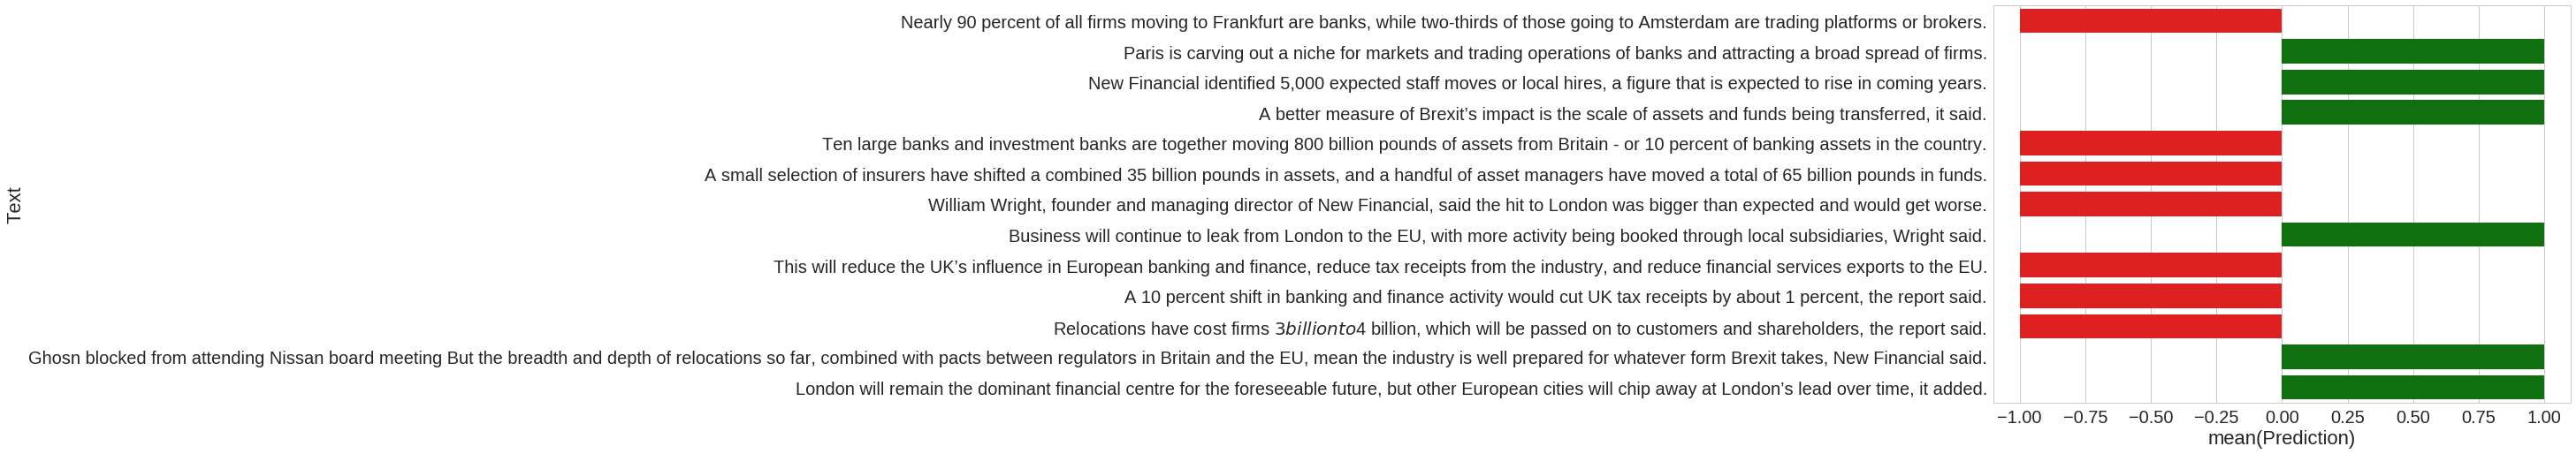

In [0]:
predict_and_plot_in_group_1(corpus2)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


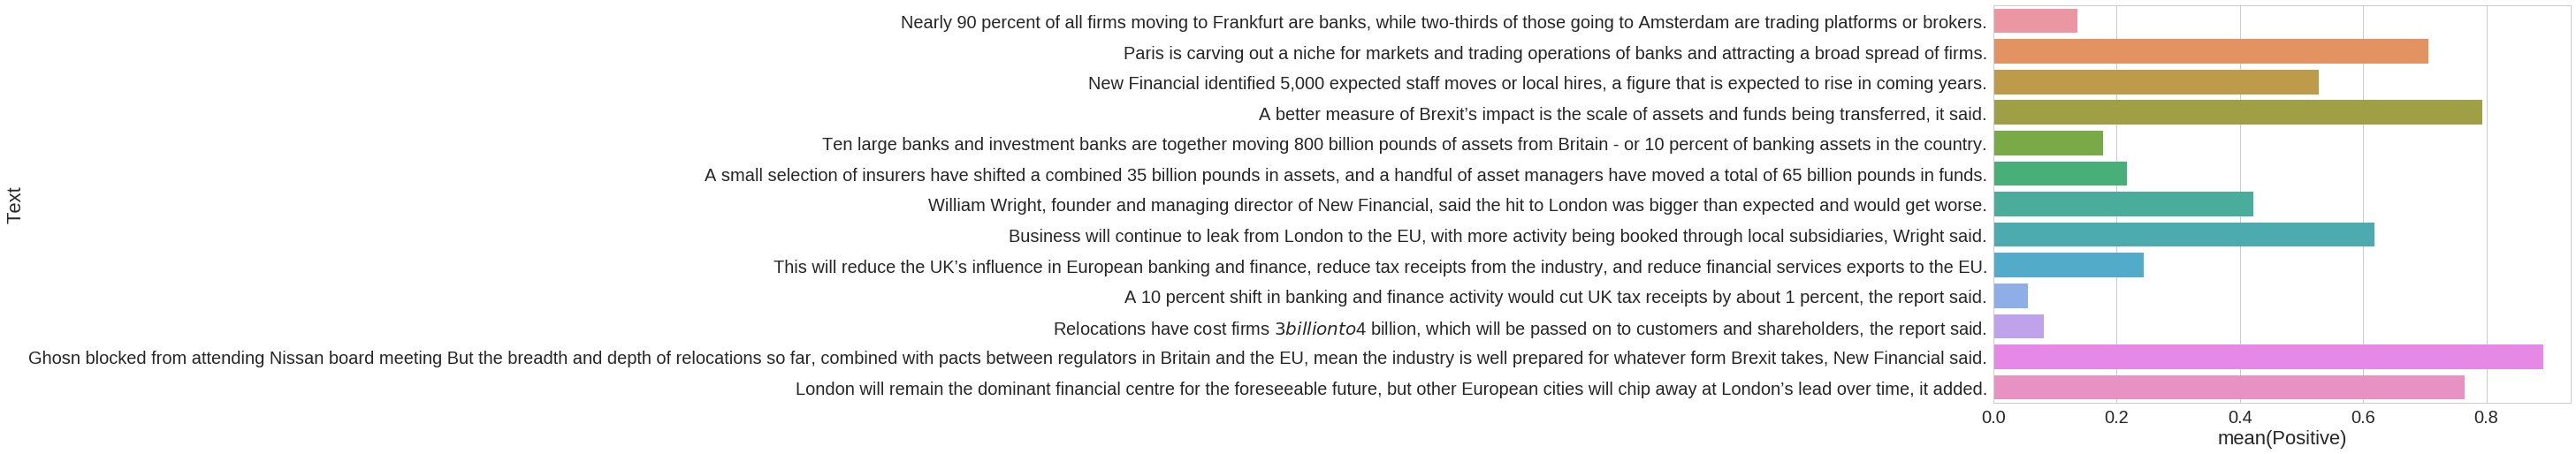

In [0]:
predict_and_plot_in_group(corpus2)

In [0]:
relation_corpus="""
People said it was worst possible thing ever,but it was completely opposite for me, it was the best experience of my life.
People said it was worst possible thing ever.
People said it was worst possible thing ever,but it was completely opposite for me it was not the best experience of my life.
"""

0.3180746038754781


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


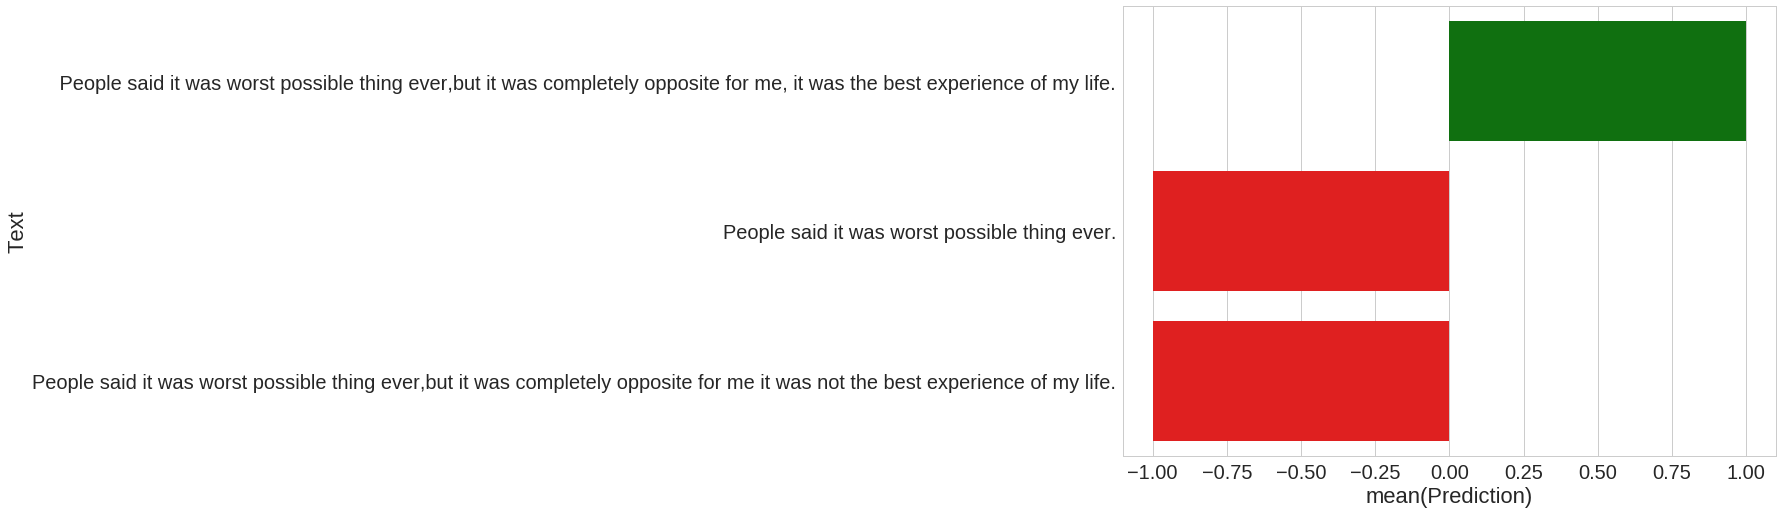

In [0]:
predict_and_plot_in_group_1(relation_corpus)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


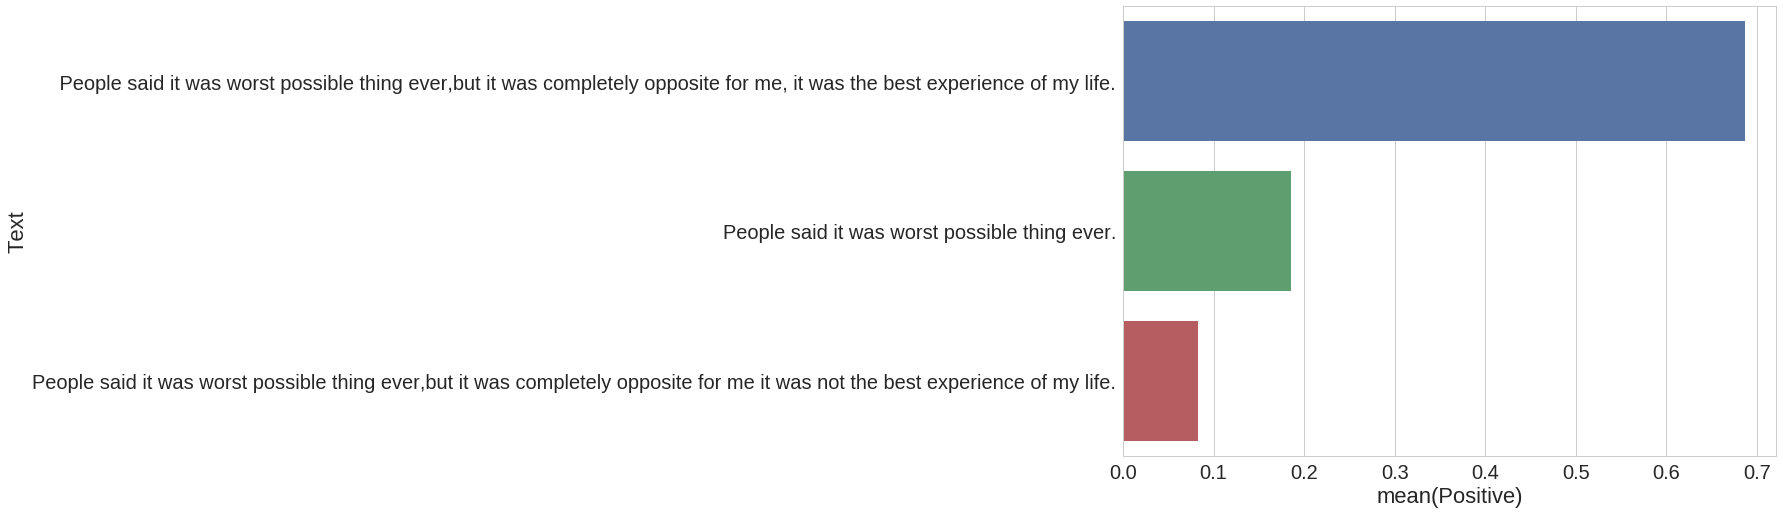

In [0]:
predict_and_plot_in_group(relation_corpus)

# Lets see what happens when we insert textual input

In [0]:
device = torch.device('cuda')
example = "this is exactly opposite of impressive its disgusting and depressing"
example_tok = []
for tok in nlp.tokenizer(example):
  
  example_tok.append(data_clas.vocab.stoi[str(tok)])
input = torch.tensor([example_tok]).to(device)
print(input)

tensor([[  19,   15,  629, 1911,   13, 1204,  112, 2200,   11, 2106]],
       device='cuda:0')


This is the input to the model

In [0]:
with torch.no_grad():
  model = learn.model
  outputs,_,_ = model[0](input)
  print(outputs[-1].shape)

torch.Size([1, 10, 400])


This is the output of language model.Each word has been converted into vector of 400 dimensions.
I will explain the use of embeddings using very nice visualization tool

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


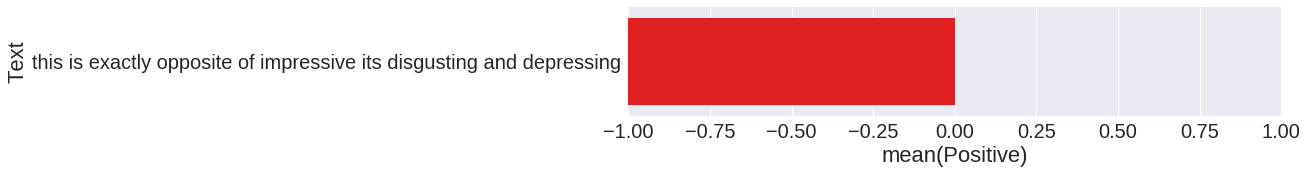

In [0]:
with torch.no_grad():
  model = learn.model
  outputs,_,_ = model(input)
  predict_and_plot(example,outputs)
  

# What is a RNN model.How is it better from other models 

# RNN Model
![**  RNN model **](https://i.imgur.com/afEXtrs.png)

In [0]:
path = untar_data(URLs.IMDB_SAMPLE)

In [0]:
data = pd.read_csv('/root/.fastai/data/imdb_sample/texts.csv')

In [18]:
data.head(   )

,label,text,is_valid
0,negative,Un-bleeping-believable! Meg Ryan doesn't even ...,False
1,positive,This is a extremely well-made film. The acting...,False
2,negative,Every once in a long while a movie will come a...,False
3,positive,Name just says it all. I watched this movie wi...,False
4,negative,This movie succeeds at being one of the most u...,False


In [16]:
pprint(data.text[5])

("From the start, you know how this movie will end. It's so full of clichés "
 'your typical NRA member will not even like this movie. I give it 2 out of '
 "10, only because of the acting of William Benton. I can't believe people "
 "voted 6+ for this movie. It's so biased towards a 'certain point of view' "
 "(once a thief...). People aren't born bad. Neither are they born good. They "
 "are born with a clean slate. It's society, parents and education what makes "
 'them who they are. And if they take the wrong turn, somewhere down the line, '
 "it certainly isn't going to be the American penal system that gets them back "
 'on track! Anyway, avoid this movie like the plague. I bet you have better '
 'things to do with your time than waste it on this piece of crap.<br /><br />')


In [17]:
data.label[5]

'negative'